# CMRM Homework Assignment No. 2 (HW2)

In [2]:
# Import libraries and modules
from matplotlib import pyplot as plt
import librosa
import os
import pretty_midi
from pretty_midi import Instrument
from pretty_midi import Note
import numpy as np
import pandas as pd
import sklearn


## Question 1

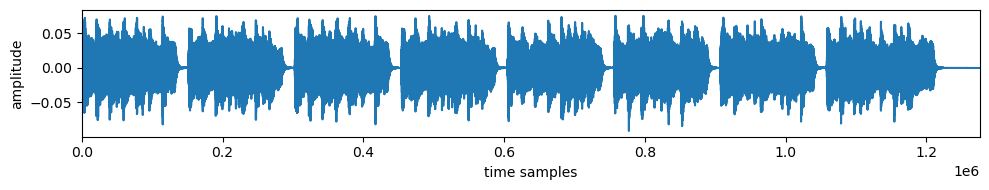

In [3]:
midi_dir = 'chorales/midi'
mix_dir = 'chorales/mix'
number = '1'

source_names = ['soprano', 'alto', 'tenor', 'bass']

# Import audio
chorale_1_path = os.path.join(mix_dir, 'chorale_1_mix.wav')
chorale_1, Fs = librosa.load(chorale_1_path)

plt.figure(figsize = (10,2))
plt.plot(chorale_1) 
plt.xlim([0, chorale_1.shape[0]])
plt.xlabel('time samples')
plt.ylabel('amplitude')
plt.tight_layout()




In [4]:
# Define the function 'extract_annotations'
def extract_annotations(midi_dir, number, source_names, verbose=False):
    """Extract annotation data contained in the midi file
    
    Args:
        midi_dir: Directory of MIDI files
        number: Number of the chorale to process
        source_names: Name of the sources
        verbose: If set to True, plot piano roll
    
    Returns:
        annotations: list of annotation data in the form [[start, duration, pitch, velocity, label]]
        start: list of note start times
        duration: list of note durations
        pitch: list of note pitches
        velocity: list of note velocity
        label: list of note instrument label (i.e., name of the source)   
    """
    annotations = []
    start = []
    duration = []
    pitch = [] 
    velocity = [] 
    labels = []
    
    if 'soprano' in source_names:
        string_soprano = midi_dir + '/chorale' + '_' + number + '_' + 'soprano' + '.mid'
        midi_soprano = pretty_midi.PrettyMIDI(string_soprano)
        soprano_notes = midi_soprano.instruments[0].notes
        for  i in range(0,len(soprano_notes)):
            annotations.append([soprano_notes[i].start, soprano_notes[i].get_duration(),soprano_notes[i].pitch,soprano_notes[i].velocity, 'soprano'])
            start.append(soprano_notes[i].start)
            duration.append(soprano_notes[i].get_duration())
            pitch.append(soprano_notes[i].pitch)
            velocity.append(soprano_notes[i].velocity)
            labels.append('soprano')
        print('soprano: ' + str(len(soprano_notes)))
    
    if 'alto' in source_names:
        string_alto = midi_dir + '/chorale' + '_' + number + '_' + 'alto' + '.mid'
        midi_alto = pretty_midi.PrettyMIDI(string_alto)
        alto_notes = midi_alto.instruments[0].notes
        for  i in range(0,len(alto_notes)):
            annotations.append([alto_notes[i].start, alto_notes[i].get_duration(), alto_notes[i].pitch, alto_notes[i].velocity, 'alto'])
            start.append(alto_notes[i].start)
            duration.append(alto_notes[i].get_duration())
            pitch.append(alto_notes[i].pitch)
            velocity.append(alto_notes[i].velocity)
            labels.append('alto')
        print('alto: ' + str(len(alto_notes)))
    
    if 'tenor' in source_names:
        string_tenor = midi_dir + '/chorale' + '_' + number + '_' + 'tenor' + '.mid'
        midi_tenor = pretty_midi.PrettyMIDI(string_tenor)
        tenor_notes = midi_tenor.instruments[0].notes
        for  i in range(0,len(tenor_notes)):
            annotations.append([tenor_notes[i].start, tenor_notes[i].get_duration(), tenor_notes[i].pitch, tenor_notes[i].velocity, 'tenor'])
            start.append(tenor_notes[i].start)
            duration.append(tenor_notes[i].get_duration())
            pitch.append(tenor_notes[i].pitch)
            velocity.append(tenor_notes[i].velocity)
            labels.append('tenor')
        print('tenor: ' + str(len(tenor_notes)))
    
    if 'bass' in source_names:
        string_bass = midi_dir + '/chorale' + '_' + number + '_' + 'bass' + '.mid'
        
        midi_bass = pretty_midi.PrettyMIDI(string_bass)
        bass_notes = midi_bass.instruments[0].notes
        for  i in range(0,len(bass_notes)):
            annotations.append([bass_notes[i].start, bass_notes[i].get_duration(), bass_notes[i].pitch, bass_notes[i].velocity, 'bass'])
            start.append(bass_notes[i].start)
            duration.append(bass_notes[i].get_duration())
            pitch.append(bass_notes[i].pitch)
            velocity.append(bass_notes[i].velocity)
            labels.append('bass')
        print('bass: ' + str(len(bass_notes)))


    print('Annotation length: ' + str(len(annotations)))
    print('Start length: ' + str(len(start)))
    print('Duration length: ' + str(len(duration)))
    print('Pitch length: ' + str(len(pitch)))
    print('Velocity length: ' + str(len(velocity)))
    print('Labels length: ' + str(len(labels)))

    print('Total notes sum: ' + str(len(soprano_notes) + len(alto_notes) + len(tenor_notes) + len (bass_notes)))

    if verbose == True: 
        soprano_piano_roll = midi_soprano.instruments[0].get_piano_roll()
        alto_piano_roll = midi_alto.instruments[0].get_piano_roll()
        tenor_piano_roll = midi_tenor.instruments[0].get_piano_roll()
        bass_piano_roll = midi_bass.instruments[0].get_piano_roll()
        
        plt.imshow(soprano_piano_roll, aspect = 'auto', cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.xlabel('Time(frames)')
        plt.ylabel('Pitch')
        plt.title('Soprano Piano Roll')
        plt.show()

        plt.imshow(alto_piano_roll, aspect = 'auto', cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.xlabel('Time(frames)')
        plt.ylabel('Pitch')
        plt.title('Alto Piano Roll')
        plt.show()

        plt.imshow(tenor_piano_roll, aspect = 'auto', cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.xlabel('Time(frames)')
        plt.ylabel('Pitch')
        plt.title('Tenor Piano Roll')
        plt.show()

        plt.imshow(bass_piano_roll, aspect = 'auto', cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.xlabel('Time(frames)')
        plt.ylabel('Pitch')
        plt.title('Bass Piano Roll')
        plt.show()

   
    return annotations, start, duration, pitch, velocity, labels

soprano: 54
alto: 60
tenor: 58
bass: 66
Annotation length: 238
Start length: 238
Duration length: 238
Pitch length: 238
Velocity length: 238
Labels length: 238
Total notes sum: 238


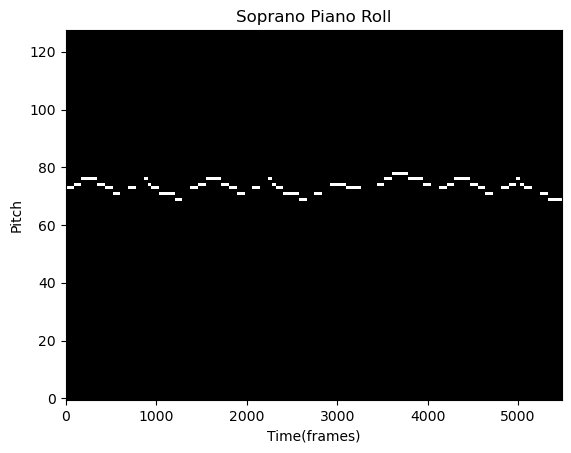

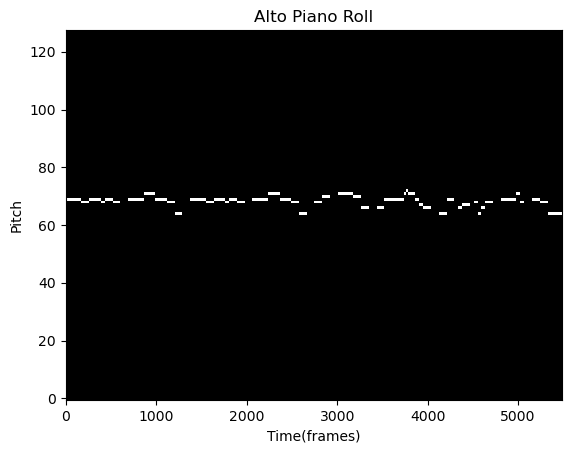

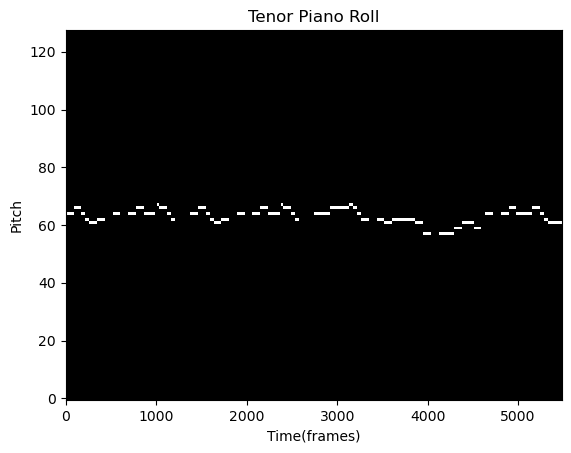

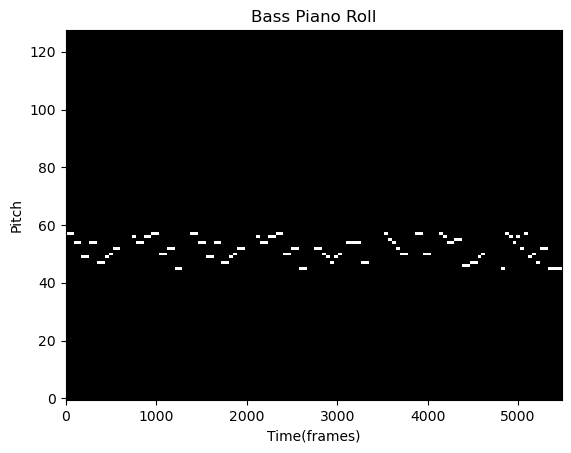

      start  duration  pitch  velocity   labels
0  0.000000  0.857143     73        90  soprano
1  0.857143  0.857143     74        90  soprano
2  1.714286  0.857143     76        90  soprano
3  2.571429  0.857143     76        90  soprano
4  3.428572  0.857143     74        90  soprano
         start  duration  pitch  velocity labels
233  51.000008  0.428571     49        90   bass
234  51.428580  0.428572     50        90   bass
235  51.857152  0.428571     47        90   bass
236  52.285723  0.857143     52        90   bass
237  53.142866  1.714286     45        90   bass


In [5]:
# Extract annotations
annotations_ch1, start__ch1, duration__ch1, pitch_ch1, velocity_ch1, labels_ch1 = extract_annotations(midi_dir, number, source_names, True)
# Define DataFrame

DataFrame = pd.DataFrame({
    'start': start__ch1,
    'duration': duration__ch1, 
    'pitch': pitch_ch1,
    'velocity': velocity_ch1,
    'labels': labels_ch1
})

print(DataFrame.head())
print(DataFrame.tail())

## Question 2

(2049, 1247)
(2049, 1247)


 ...]

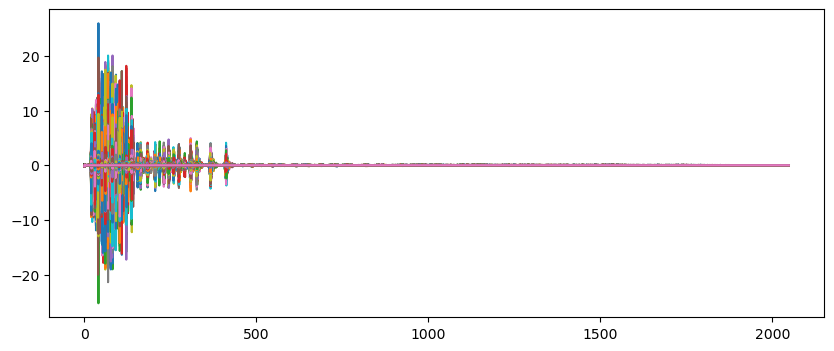

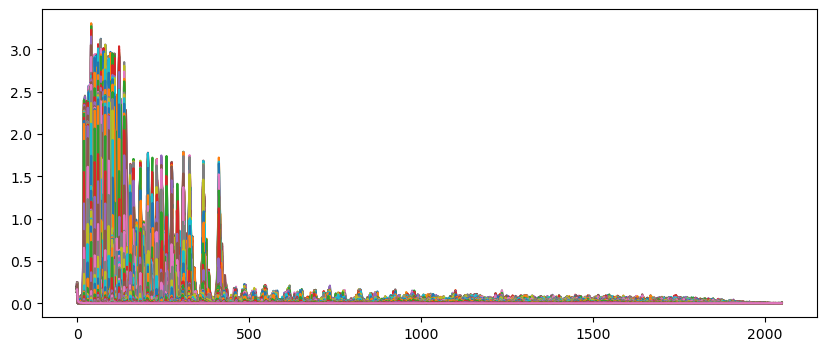

In [7]:
N_fft = 4096
H_fft = N_fft // 4

stft_x = librosa.stft(y = chorale_1, n_fft = N_fft, hop_length = H_fft)

print(np.shape(stft_x))

stft_compressed = np.log(1 + np.abs(stft_x))

print(np.shape(stft_compressed))

feature_time_axis = np.arange(stft_x.shape[0])
plt.figure(figsize=(10,4))
plt.plot(feature_time_axis, stft_x)

feature_time_axis = np.arange(stft_compressed.shape[0])
plt.figure(figsize=(10,4))
plt.plot(feature_time_axis, stft_compressed)

# Input Spectrogram


# Spectrogram shape


# Initialize activations and templates


# Instantiate NMF model


# NMF factorization


# Error norm


In [ ]:
# Plots


## Question 3

In [ ]:
# Define the function 'split annotations'
def split_annotations(annotations):
    """Split the annotation data into soprano, alto, tenor, and bass
    
    Args: 
        annotations: Annotation data in the form [[start, duration, pitch, velocity, label]]
    
    Returns: 
        ann_sop: Annotation data for soprano
        ann_alt: Annotation data for alto
        ann_ten: Annotation data for tenor
        ann_bas: Annotation data for bass
    """   
            
    return ann_sop, ann_alt, ann_ten, ann_bas

In [ ]:
# Split the annotations


# Obtain the spectral masks for each source


# Apply spectral masks


# Plot first source reconstructions



## Question 4

In [ ]:
# Soprano source separation


# Alto source separation


# Tenor source separation


# Bass source separation


# Listen to the results using ipd.Audio



## Question 5

In [ ]:
# Define the function 'separate'
def separate(x, annotations, N_fft=4096, H_fft=1024):
    """Separate a chorale into its sources (i.e., soprano, alto, tenor, bass)
       through score-informed NMF
       
       Args:
           x: Input audio file
           annotations: Annotation data in the form [[start, duration, pitch, velocity, label]]
           N_fft: Length of the FFT
           H_fft: Hop size of the FFT
           
       Returns:
           x_sop: Soprano audio file
           x_alt: Alto audio file
           x_ten: Tenor audio file
           x_bas: Bass audio file
    """
    
    return x_sop, x_alt, x_ten, x_bas

In [ ]:
# Write a pipeline for separating all the chorales into their sources

